# Notebook evaluating metrics for particular node/edge configuration

In [2]:
# Imprt helper functions
# If new server on Descartes Labs, need to install rioxarray 
try: import rioxarray
except: 
    %pip install rioxarray
    
# Import helper functions
import helper_functions as hf
import netconf.netconf as nc

In [3]:
# Define variables
# Location variables
lat, lon, zoom = 33.893, 35.512, 14 # Map properties

# Building Footprints, damade assessments and interferogram file paths
buildingFile = "./data/beirutBuildingFootprints.geojson" # OSM data
assessmentFile = "./data/geopalData.csv" # GeoPal data
ifgPreFile = "./data/beirutPrePreExplosionIfg.tif" # SNAP output 1
ifgPostFile = "./data/beirutPrePostExplosionIfg.tif" # SNAP output 2
ifgBoth = True # If false, only uses prePost rather than difference between two

# A priori damage beliefs (green, yellow, red decisions)
decisions = {'GREEN (inspected) أخضر (تم دراسته)': False, 'YELLOW (restricted use) أصفر (لا يصلح للسكن)': True, 'RED (unsafe/evacuate) أحمر (غير آمن/للاخلاء)ء': True}
initBeliefs, confidence = [1,0], [0,0.9,1] # [noDmg, dmg], [Green,Yellow,Red]

# Edge creation
adjacent, geoNeighbors, ifgValues, neighbours = False, 2, True, 4

# Train/test split
testSplit, dmgThresh, stdTest, randomState = 0.3, 0.5, True, 1

# Classifications
targets = ['Undamaged', 'Damaged']

In [4]:
## Import Ground Data and combine
# Import footprints geojson
footprints = hf.import_OSM_fps(buildingFile)

# Import GeoPal assessments
assessments = hf.import_located_geopal_data(assessmentFile)

# Get joint geodataframe of building footprints with damage assessments
joint = hf.join_gdfs(footprints, assessments, column='decision')

# Display map of assessments upon which to draw Polygon for analysis
m1 = hf.create_map(lat, lon, zoom)
m1 = hf.plot_assessments(joint, m1)
m1, testPoly = hf.draw_polygon(joint, m1, stdTest)
m1

Map(center=[33.893, 35.512], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom…

In [5]:
# Import interferogram to dataframe
ifg, poly = hf.ifg_to_df(ifgPostFile, testPoly)

# If using both interferograms then subtract phase of second from first to get differecne
if ifgBoth: 
    ifgPre, _ = hf.ifg_to_df(ifgPreFile, testPoly)
    ifg = ifgPre-ifg

  0%|          | 0/11 [00:00<?, ?it/s]

Nodes: 67210, Edges: 268840
It	max{del(B)}	del(label)

0	1.10764e+00		73

1	2.96462e-01		0

2	2.21959e-01		0

3	7.18284e-02		0

4	4.58196e-02		0

5	1.67592e-02		0

6	9.62990e-03		0

7	3.82168e-03		0

8	2.04974e-03		0

9	8.59046e-04		0

10	4.40199e-04		0

11	1.91343e-04		0

12	9.51228e-05		0

Time elapsed: 100.16729760169983 seconds
              precision    recall  f1-score   support

   Undamaged       0.99      1.00      0.99       954
     Damaged       0.00      0.00      0.00        11

    accuracy                           0.99       965
   macro avg       0.49      0.50      0.50       965
weighted avg       0.98      0.99      0.98       965



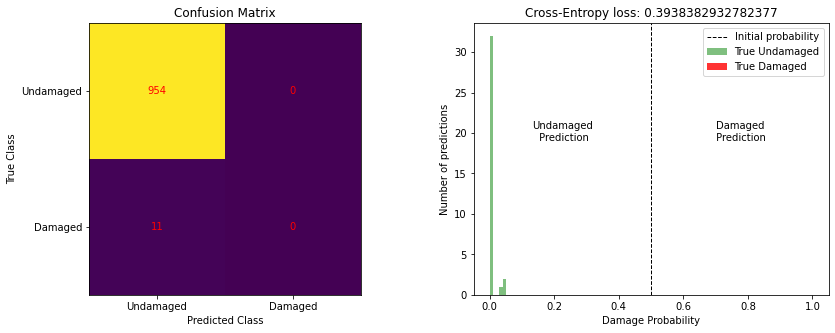

  9%|▉         | 1/11 [01:44<17:28, 104.85s/it]

Nodes: 67210, Edges: 268840
It	max{del(B)}	del(label)

0	9.96874e-01		73

1	2.66816e-01		0

2	1.99763e-01		0

3	6.46455e-02		0

4	4.12377e-02		0

5	1.50833e-02		0

6	8.66692e-03		0

7	3.43952e-03		0

8	1.84477e-03		0

9	7.73143e-04		0

10	3.96180e-04		0

11	1.72209e-04		0

12	8.56107e-05		0

Time elapsed: 98.94177412986755 seconds
              precision    recall  f1-score   support

   Undamaged       0.99      1.00      0.99       954
     Damaged       0.00      0.00      0.00        11

    accuracy                           0.99       965
   macro avg       0.49      0.50      0.50       965
weighted avg       0.98      0.99      0.98       965



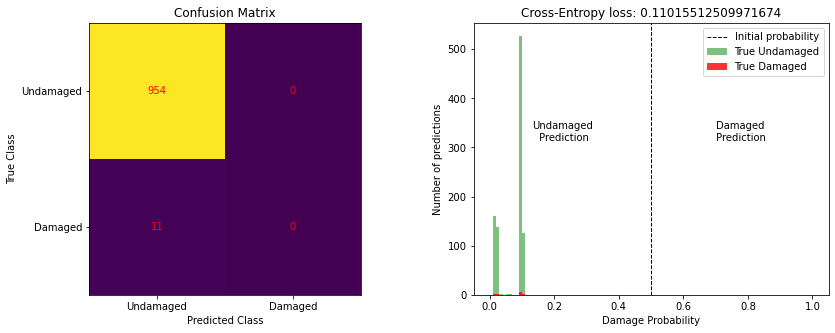

 18%|█▊        | 2/11 [03:28<15:36, 104.08s/it]

Nodes: 67210, Edges: 268840
It	max{del(B)}	del(label)

0	8.86110e-01		73

1	2.37170e-01		0

2	1.77567e-01		0

3	5.74627e-02		0

4	3.66558e-02		0

5	1.34074e-02		0

6	7.70395e-03		0

7	3.05736e-03		0

8	1.63980e-03		0

9	6.87240e-04		0

10	3.52161e-04		0

11	1.53075e-04		0

12	7.60986e-05		0

Time elapsed: 99.24951171875 seconds
              precision    recall  f1-score   support

   Undamaged       0.99      1.00      0.99       954
     Damaged       0.00      0.00      0.00        11

    accuracy                           0.99       965
   macro avg       0.49      0.50      0.50       965
weighted avg       0.98      0.99      0.98       965



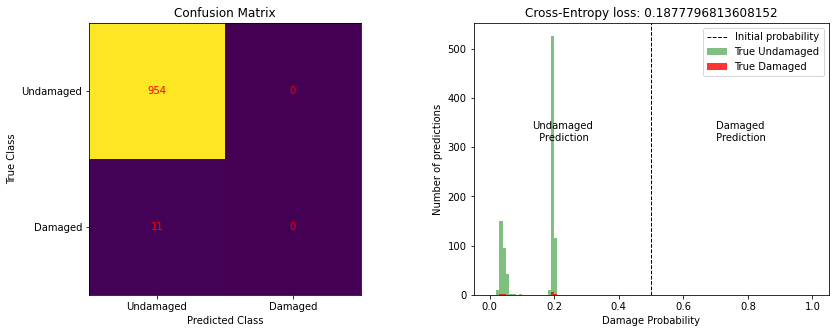

 27%|██▋       | 3/11 [05:12<13:52, 104.00s/it]

Nodes: 67210, Edges: 268840
It	max{del(B)}	del(label)

0	7.75346e-01		73

1	2.07524e-01		0

2	1.55371e-01		0

3	5.02799e-02		0

4	3.20738e-02		0

5	1.17315e-02		0

6	6.74098e-03		0

7	2.67520e-03		0

8	1.43483e-03		0

9	6.01337e-04		0

10	3.08142e-04		0

11	1.33941e-04		0

12	6.65865e-05		0

Time elapsed: 98.84985041618347 seconds
              precision    recall  f1-score   support

   Undamaged       0.99      1.00      0.99       954
     Damaged       0.00      0.00      0.00        11

    accuracy                           0.99       965
   macro avg       0.49      0.50      0.50       965
weighted avg       0.98      0.99      0.98       965



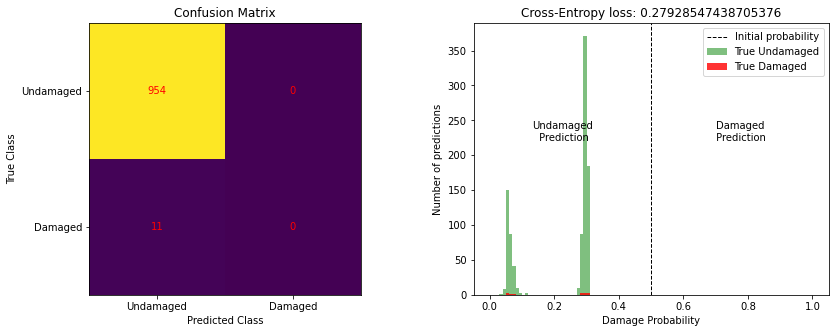

 36%|███▋      | 4/11 [06:55<12:06, 103.84s/it]

Nodes: 67210, Edges: 268840
It	max{del(B)}	del(label)

0	6.64582e-01		73

1	1.77877e-01		0

2	1.33175e-01		0

3	4.30970e-02		0

4	2.74919e-02		0

5	1.00556e-02		0

6	5.77800e-03		0

7	2.29304e-03		0

8	1.22986e-03		0

9	5.15434e-04		0

10	2.64123e-04		0

11	1.14808e-04		0

12	5.70744e-05		0

Time elapsed: 98.71129894256592 seconds
              precision    recall  f1-score   support

   Undamaged       0.99      1.00      0.99       954
     Damaged       0.00      0.00      0.00        11

    accuracy                           0.99       965
   macro avg       0.49      0.50      0.50       965
weighted avg       0.98      0.99      0.98       965



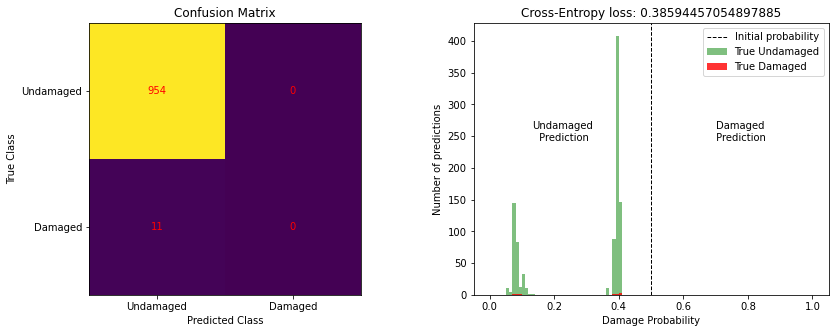

 45%|████▌     | 5/11 [08:39<10:22, 103.68s/it]

Nodes: 67210, Edges: 268840
It	max{del(B)}	del(label)

0	5.53819e-01		388

1	1.48231e-01		260

2	1.10979e-01		213

3	3.59142e-02		195

4	2.29100e-02		158

5	8.37969e-03		138

6	4.81503e-03		126

7	1.91087e-03		107

8	1.02489e-03		91

9	4.29531e-04		76

10	2.20104e-04		60

11	9.56735e-05		63

Time elapsed: 93.75722527503967 seconds
              precision    recall  f1-score   support

   Undamaged       0.99      0.99      0.99       954
     Damaged       0.00      0.00      0.00        11

    accuracy                           0.98       965
   macro avg       0.49      0.50      0.50       965
weighted avg       0.98      0.98      0.98       965



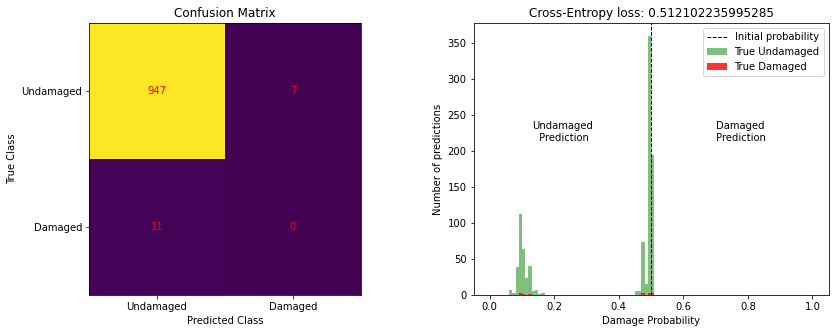

 55%|█████▍    | 6/11 [10:17<08:29, 101.95s/it]

Nodes: 67210, Edges: 268840
It	max{del(B)}	del(label)

0	6.64582e-01		65314

1	1.77877e-01		0

2	1.33175e-01		0

3	4.30970e-02		0

4	2.74915e-02		0

5	1.00554e-02		0

6	5.77785e-03		0

7	2.29297e-03		0

8	1.22982e-03		0

9	5.15418e-04		0

10	2.64114e-04		0

11	1.14804e-04		0

12	5.70726e-05		0

Time elapsed: 98.7661304473877 seconds
              precision    recall  f1-score   support

   Undamaged       0.99      0.32      0.48       954
     Damaged       0.01      0.64      0.02        11

    accuracy                           0.32       965
   macro avg       0.50      0.48      0.25       965
weighted avg       0.98      0.32      0.47       965



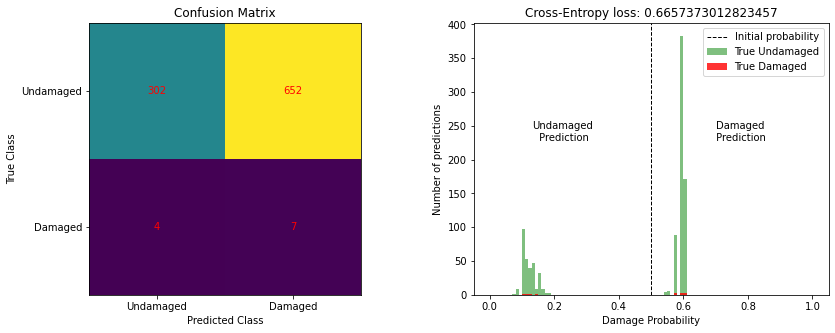

 64%|██████▎   | 7/11 [12:01<06:49, 102.46s/it]

Nodes: 67210, Edges: 268840
It	max{del(B)}	del(label)

0	7.75346e-01		65314

1	2.07524e-01		0

2	1.55371e-01		0

3	5.02799e-02		0

4	3.20734e-02		0

5	1.17313e-02		0

6	6.74082e-03		0

7	2.67513e-03		0

8	1.43479e-03		0

9	6.01321e-04		0

10	3.08133e-04		0

11	1.33938e-04		0

12	6.65847e-05		0

Time elapsed: 99.6627140045166 seconds
              precision    recall  f1-score   support

   Undamaged       0.99      0.32      0.48       954
     Damaged       0.01      0.64      0.02        11

    accuracy                           0.32       965
   macro avg       0.50      0.48      0.25       965
weighted avg       0.98      0.32      0.47       965



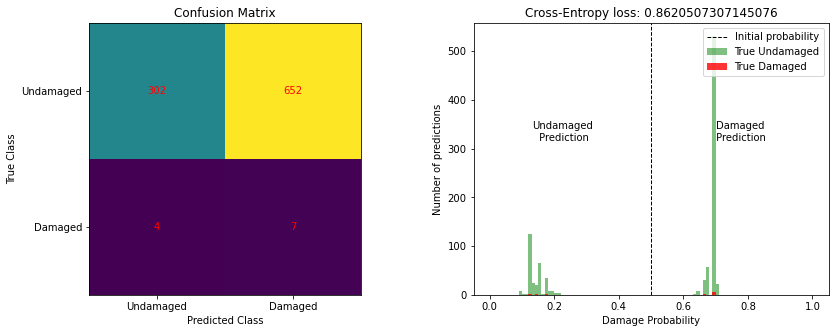

 73%|███████▎  | 8/11 [13:45<05:09, 103.02s/it]

Nodes: 67210, Edges: 268840
It	max{del(B)}	del(label)

0	8.86110e-01		65314

1	2.37170e-01		0

2	1.77567e-01		0

3	5.74627e-02		0

4	3.66553e-02		0

5	1.34072e-02		0

6	7.70379e-03		0

7	3.05729e-03		0

8	1.63976e-03		0

9	6.87224e-04		0

10	3.52152e-04		0

11	1.53072e-04		0

12	7.60968e-05		0

Time elapsed: 99.62346506118774 seconds
              precision    recall  f1-score   support

   Undamaged       0.99      0.32      0.48       954
     Damaged       0.01      0.64      0.02        11

    accuracy                           0.32       965
   macro avg       0.50      0.48      0.25       965
weighted avg       0.98      0.32      0.47       965



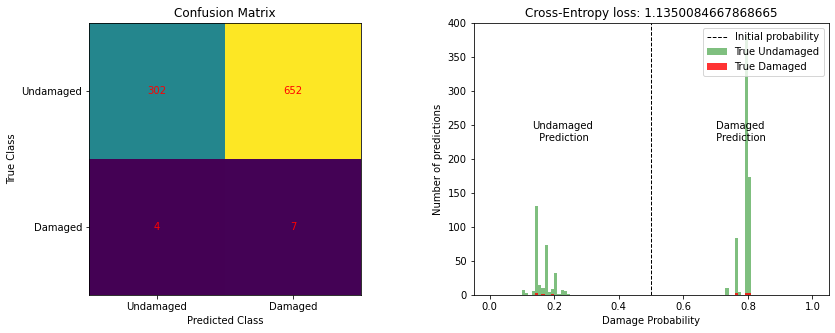

 82%|████████▏ | 9/11 [15:29<03:26, 103.40s/it]

Nodes: 67210, Edges: 268840
It	max{del(B)}	del(label)

0	9.96874e-01		65314

1	2.66816e-01		0

2	1.99763e-01		0

3	6.46455e-02		0

4	4.12372e-02		0

5	1.50831e-02		0

6	8.66677e-03		0

7	3.43945e-03		0

8	1.84473e-03		0

9	7.73127e-04		0

10	3.96171e-04		0

11	1.72206e-04		0

12	8.56089e-05		0

Time elapsed: 98.9705901145935 seconds
              precision    recall  f1-score   support

   Undamaged       0.99      0.32      0.48       954
     Damaged       0.01      0.64      0.02        11

    accuracy                           0.32       965
   macro avg       0.50      0.48      0.25       965
weighted avg       0.98      0.32      0.47       965



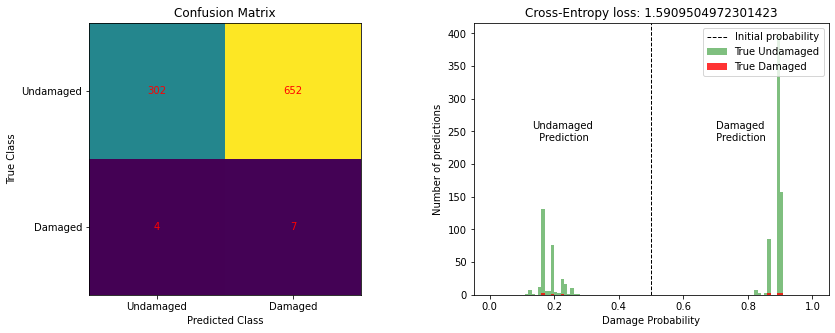

 91%|█████████ | 10/11 [17:13<01:43, 103.49s/it]

Nodes: 67210, Edges: 268840
It	max{del(B)}	del(label)

0	1.10764e+00		65314

1	2.96462e-01		0

2	2.21959e-01		0

3	7.18284e-02		0

4	4.58192e-02		0

5	1.67590e-02		0

6	9.62974e-03		0

7	3.82161e-03		0

8	2.04970e-03		0

9	8.59030e-04		0

10	4.40190e-04		0

11	1.91340e-04		0

12	9.51210e-05		0

Time elapsed: 99.87892723083496 seconds
              precision    recall  f1-score   support

   Undamaged       0.99      0.32      0.48       954
     Damaged       0.01      0.64      0.02        11

    accuracy                           0.32       965
   macro avg       0.50      0.48      0.25       965
weighted avg       0.98      0.32      0.47       965



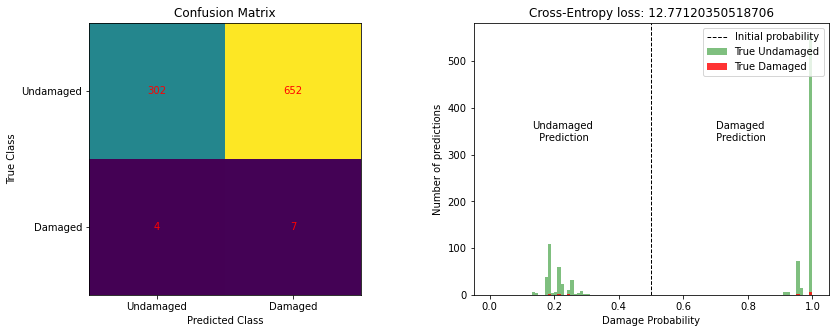

100%|██████████| 11/11 [18:58<00:00, 103.47s/it]


In [10]:
# import numpy as np
from tqdm import tqdm

losses = []

for i in tqdm([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]):

    # Initialise beliefs for each pixel
    initial = hf.init_beliefs(ifg, columns=['noDmg','dmg','ifg'], initBeliefs=[1-i, i])

    # Split train/test set for located nodes
    X_train, X_test, y_train, y_test = hf.train_test_split(joint, poly, column = 'decision', testSplit=testSplit, randomState = randomState)

    # Create nodes
    nodes = hf.create_nodes(initial, X_train)

    # Assign prior beliefs from assessments
    priors = hf.prior_beliefs(nodes, decisions, confidence, column = 'decision', beliefColumns = ['noDmg', 'dmg'])
    
    # Create edges
    if adjacent and (neighbours == 0): edges = hf.create_edges(nodes, adjacent=adjacent, values=False, neighbours=[neighbours])
    elif adjacent is False and (neighbours == 0): continue
    else: edges = hf.create_edges(nodes, adjacent=adjacent, geo_neighbors=geoNeighbors, values=['ifg'] if ifgValues else False, neighbours=[neighbours])

    # Run belief propagation
    beliefs, _ = nc.netconf(edges,priors,verbose=True)

    # Evaluation Metrics
    # Get y_true vs y_pred for test set
    y_true, y_pred = hf.get_labels(initial, X_test, beliefs, decisions, column='decision')

    # Classification metrics
    yp_clf, classes = hf.class_metrics(y_true, y_pred, targets, threshold=dmgThresh)

    fig, axs = hf.create_subplots(1,2, figsize=[14,5])
    # Confusion matrix
    axs = hf.confusion_matrix(axs, y_true, yp_clf, classes)

    # Cross entropy / Confidence metrics
    axs, loss = hf.cross_entropy_metrics(axs, y_true, y_pred, classes, dmgThresh, i) #initBeliefs[1])
    hf.show_plot()

    losses.append([adjacent, neighbours, loss])

    # Save figure
    hf.save_plot(fig, 'results/Beirut_adj{}{}_ifgDiff{}{}_rs{}_ts3_init{}'.format(str(adjacent),str(geoNeighbors),str(ifgValues),str(neighbours),str(randomState),str(i)[-1]))

In [11]:
losses

[[False, 4, 0.3938382932782377],
 [False, 4, 0.11015512509971674],
 [False, 4, 0.1877796813608152],
 [False, 4, 0.27928547438705376],
 [False, 4, 0.38594457054897885],
 [False, 4, 0.512102235995285],
 [False, 4, 0.6657373012823457],
 [False, 4, 0.8620507307145076],
 [False, 4, 1.1350084667868665],
 [False, 4, 1.5909504972301423],
 [False, 4, 12.77120350518706]]

In [12]:
# Run belief propagation
beliefs, _ = nc.netconf(edges,priors,verbose=True)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

              precision    recall  f1-score   support

   Undamaged       0.92      1.00      0.95       210
     Damaged       0.00      0.00      0.00        19

    accuracy                           0.91       229
   macro avg       0.46      0.50      0.48       229
weighted avg       0.84      0.91      0.88       229



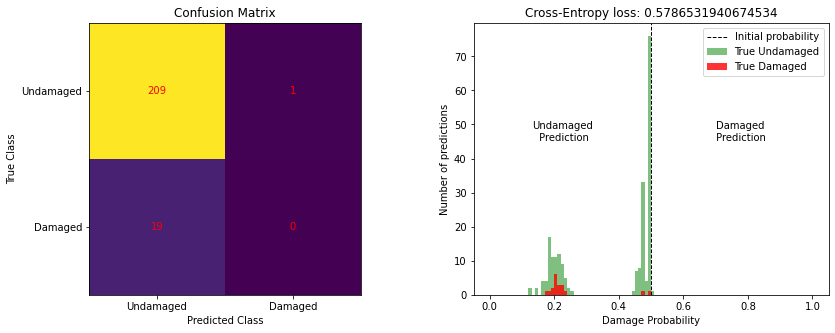

In [7]:
# Evaluation Metrics
# Get y_true vs y_pred for test set
y_true, y_pred = hf.get_labels(initial, X_test, beliefs, decisions, column='decision')

# Classification metrics
yp_clf, classes = hf.class_metrics(y_true, y_pred, targets, threshold=dmgThresh)

fig, axs = hf.create_subplots(1,2, figsize=[14,5])
# Confusion matrix
axs = hf.confusion_matrix(axs, y_true, yp_clf, classes)
  
# Cross entropy / Confidence metrics
axs = hf.cross_entropy_metrics(axs, y_true, y_pred, classes, dmgThresh, initBeliefs[1])

hf.show_plot()

In [10]:
# Save figure
save_plot(fig, 'results/Beirut_adj{}_ifg{}{}'.format(str(adjacent),str(ifgValues),str(neighbours)))

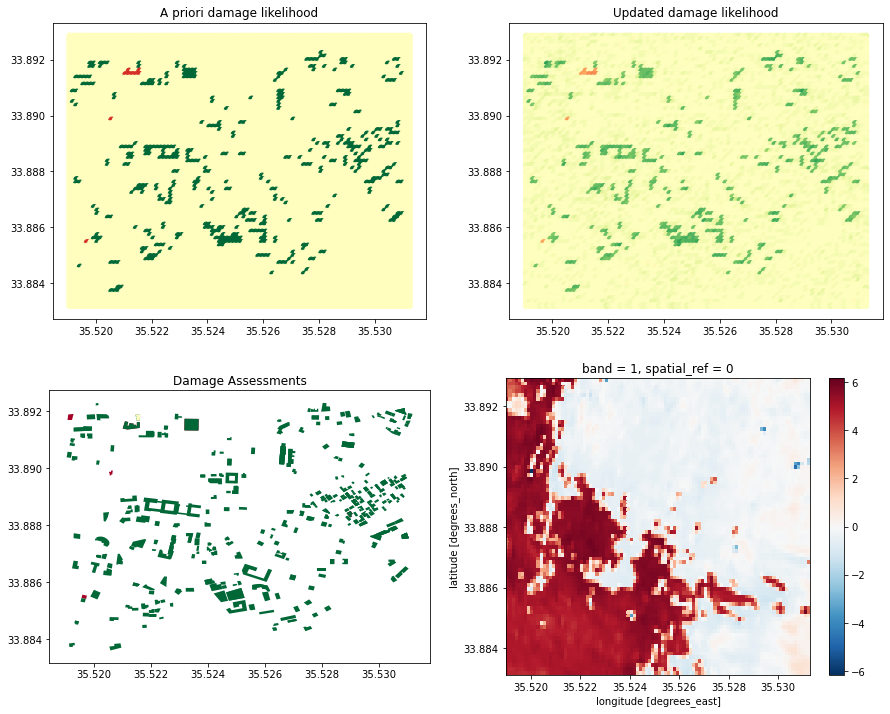

In [11]:
# Visualise spatial results
fig, axs = hf.create_subplots(2,2,figsize=[15,12])

prePlot = hf.belief_plot(nodes, axs[0,0], 'dmg', normalise=False)
postPlot = hf.belief_plot(nodes, axs[0,1], beliefs, normalise=True)
assessPlt = joint.loc[joint.within(poly)].plot(ax=axs[1,0], column='decision',cmap='RdYlGn_r')
ifgPlot = (hf.cropped_ifg(ifgPreFile,testPoly)-hf.cropped_ifg(ifgPostFile,testPoly)).plot(ax=axs[1,1])
prePlot.set_title('A priori damage likelihood'), postPlot.set_title('Updated damage likelihood'), assessPlt.set_title('Damage Assessments')

hf.show_plot()